In [ ]:
# Read the files
with open("deen_transformer_baseline.log", "r") as f:
    baseline = f.readlines()

with open("deen_transformer_pre.log", "r") as f:
    pre = f.readlines()

with open("deen_transformer_post.log", "r") as f:
    post = f.readlines()


500 56.61
1000 49.93
1500 45.33
2000 35.25
2500 28.44
3000 25.79
3500 23.77
4000 22.4
4500 21.26
5000 19.87
5500 18.8
6000 17.61
6500 16.55
7000 15.42
7500 14.26
8000 13.3
8500 12.62
9000 12.25
9500 11.83
10000 11.48
11000 10.82
11500 10.69
12000 10.58
12500 10.41
13000 10.24
13500 10.05
14000 9.97
14500 9.84
15000 9.75
15500 9.6
16000 9.41
16500 9.42
17000 9.41
17500 9.3
18000 9.22
18500 9.25
19000 9.12
19500 8.97
20000 8.92
21000 8.95
21500 8.92
22000 8.86
22500 8.81
23000 8.75
23500 8.7
24000 8.66
24500 8.59
25000 8.68
25500 8.63
26000 8.57
26400 8.65
27000 8.55
27500 8.53
28000 8.42
28500 8.41
29000 8.38
29500 8.44
30000 8.44
30700 8.34
31500 8.39
32000 8.23
32500 8.19
33000 8.33
33500 8.33
34000 8.33
34500 8.27
35000 8.24
35500 8.2
36000 8.12
36500 8.11
37000 8.25
37500 8.27
38000 8.13
38500 8.23
39000 8.1
39500 8.11
40000 8.15
500 34.88
1000 25.01
1500 21.9
2000 19.46
2500 18.11
3000 17.01
3500 16.15
4000 15.33
4500 14.6
5000 13.44
5500 12.26
6000 11.43
6500 10.91
7000 10.44
7500

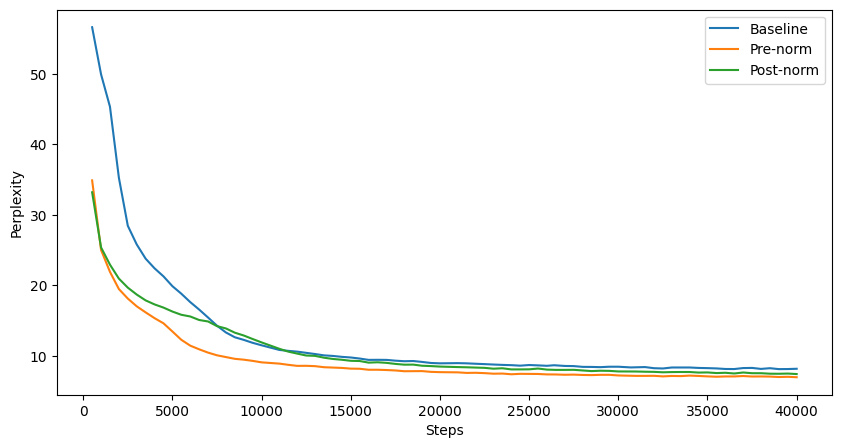

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def extract_perplexity(filename):
    with open(filename, 'r') as f:
        logs = f.read().split('--\n')

    steps = []
    ppls = []

    for log in logs:
        if 'joeynmt.prediction - Evaluation result' in log:
            step = int(re.findall(r"Step:\s+(\d+)", log)[0])
            ppl = float(re.findall(r"ppl:\s+(\d+\.\d+)", log)[0])
            print(step, ppl)

            steps.append(step)
            ppls.append(ppl)

    return pd.DataFrame({'Step': steps, 'Perplexity': ppls})

# Read log files
baseline_df = extract_perplexity('deen_transformer_baseline.log')
pre_df = extract_perplexity('deen_transformer_pre.log')
post_df = extract_perplexity('deen_transformer_post.log')
baseline_df.to_csv('baseline.csv')
pre_df.to_csv('pre.csv')

# Plot
plt.figure(figsize=(10, 5))

plt.plot(baseline_df['Step'], baseline_df['Perplexity'], label='Baseline')
plt.plot(pre_df['Step'], pre_df['Perplexity'], label='Pre-norm')
plt.plot(post_df['Step'], post_df['Perplexity'], label='Post-norm')

plt.xlabel('Steps')
plt.ylabel('Perplexity')
plt.legend()

plt.show()
